In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "/Users/t866229/input/prophet/AAPL_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,121.940002,123.849998,121.209999,123.279999,113.615921,61354500
1,2015-07-13,125.029999,125.760002,124.320000,125.660004,115.809349,41440500
2,2015-07-14,126.040001,126.370003,125.040001,125.610001,115.763260,31768100
3,2015-07-15,125.720001,127.150002,125.580002,126.820000,116.878418,33649200
4,2015-07-16,127.739998,128.570007,127.349998,128.509995,118.435951,36222400


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,173.081581,174.853884,171.506060,173.281573,168.479113,3.498206e+07
std,62.929090,63.887647,62.243219,63.166480,65.117087,1.725036e+07
min,90.000000,91.669998,89.470001,90.339996,84.962914,1.136200e+07
25%,116.494999,117.410000,115.614998,116.355004,109.506489,2.368100e+07
50%,166.000000,168.440002,164.470001,166.440002,161.427368,3.046720e+07
75%,204.190002,206.059998,202.639999,204.440002,201.606247,4.102715e+07
max,385.049988,385.269989,378.690002,383.010010,383.010010,1.622063e+08


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-10,123.279999
1,2015-07-13,125.660004
2,2015-07-14,125.610001
3,2015-07-15,126.820000
4,2015-07-16,128.509995


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

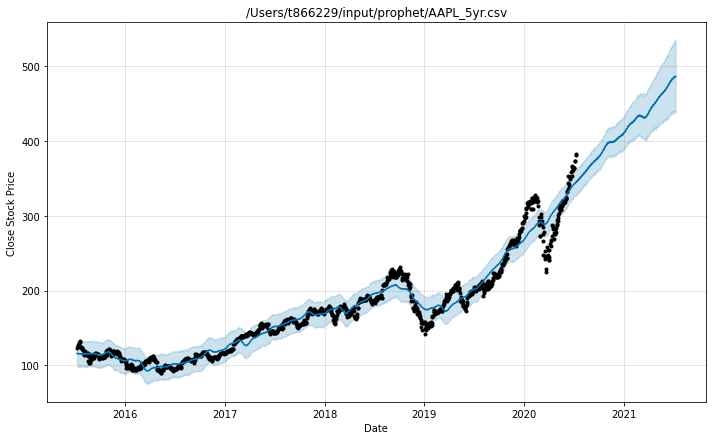

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

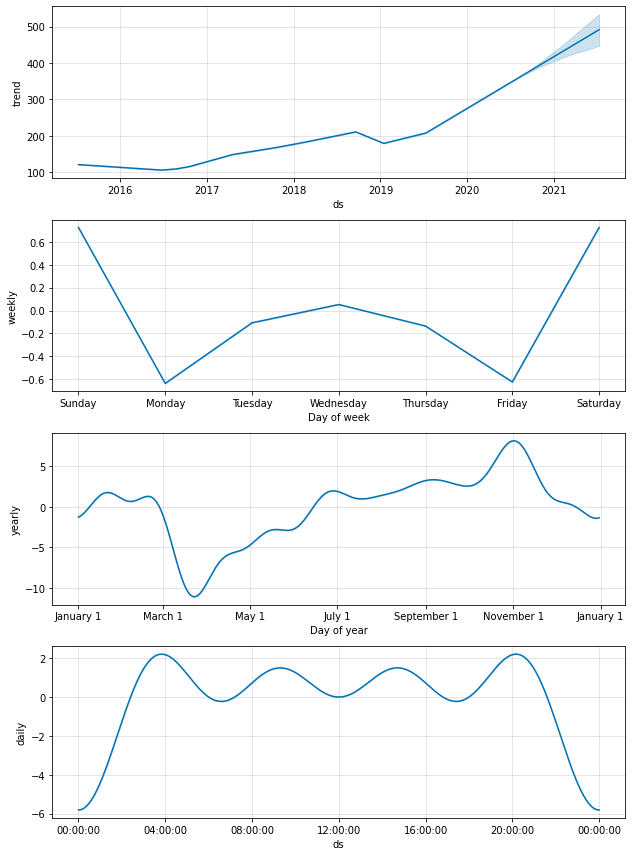

In [6]:
m.plot_components(prediction)
plt.show()